In [1]:
# =============================================================================
# NOTEBOOK 02 : EXPLORATION ET VISUALISATION DES DONNÉES
# =============================================================================
# Objectif : Analyser le dataset généré, comprendre sa structure
#            et visualiser les images
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration pour de beaux graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("📊 EXPLORATION DES DONNÉES - RECONNAISSANCE DE GESTES")
print("="*70)

# Vérifier l'existence des fichiers
fichiers_requis = [
    'data/raw/sign_mnist_train.csv',
    'data/raw/sign_mnist_test.csv'
]

print(f"\n🔍 Vérification des fichiers...\n")
for fichier in fichiers_requis:
    if os.path.exists(fichier):
        taille_kb = os.path.getsize(fichier) / 1024
        print(f"✅ {fichier} ({taille_kb:.1f} KB)")
    else:
        print(f"❌ {fichier} MANQUANT")
        raise FileNotFoundError(f"Exécutez d'abord 01_generate_data.ipynb")

# Charger les données
print(f"\n⏳ Chargement des données...\n")

train_df = pd.read_csv('data/raw/sign_mnist_train.csv')
test_df = pd.read_csv('data/raw/sign_mnist_test.csv')

print(f"✅ Données chargées avec succès !")
print(f"\n📦 Dataset train : {train_df.shape}")
print(f"   → {train_df.shape[0]} images")
print(f"   → {train_df.shape[1]} colonnes (1 label + 784 pixels)")

print(f"\n📦 Dataset test : {test_df.shape}")
print(f"   → {test_df.shape[0]} images")
print(f"   → {test_df.shape[1]} colonnes (1 label + 784 pixels)")

📊 EXPLORATION DES DONNÉES - RECONNAISSANCE DE GESTES

🔍 Vérification des fichiers...

✅ data/raw/sign_mnist_train.csv (2025.5 KB)
✅ data/raw/sign_mnist_test.csv (676.5 KB)

⏳ Chargement des données...

✅ Données chargées avec succès !

📦 Dataset train : (900, 785)
   → 900 images
   → 785 colonnes (1 label + 784 pixels)

📦 Dataset test : (300, 785)
   → 300 images
   → 785 colonnes (1 label + 784 pixels)



📋 INFORMATIONS DÉTAILLÉES

👀 Aperçu des 5 premières lignes du dataset train :

   label   0   1   2   3   4   5   6   7   8  ...  774  775  776  777  778  \
0      0  18  29   7   1   7  24  17   9  27  ...    5   23   16   29    6   
1      0  17  11   7  20   2   3  11   2  16  ...   27   27   16   10   14   
2      0   3  10   1  27  28  12  22   2  13  ...   16    9   24   22   18   
3      0  24  25  25  28  25  26  14   8   1  ...    0   20   25   28   26   
4      0  17  21  17  10   5   2  26  28  18  ...   17    6   10   17    6   

   779  780  781  782  783  
0    4    2   11    7   14  
1   24    4   16   11   12  
2    7    4   22   18    1  
3   26   15   27   13   27  
4   14   27   20    5    7  

[5 rows x 785 columns]

📊 Informations sur le DataFrame :
   - Nombre de lignes      : 900
   - Nombre de colonnes    : 785
   - Mémoire utilisée      : 5519.7 KB
   - Types de données      : {dtype('int64'): 785}

🔍 Valeurs manquantes :
   ✅ Aucune valeur manquante

📊 Distri


🔢 STATISTIQUES DES VALEURS DE PIXELS

📊 Statistiques globales des pixels :
   - Valeur minimum  : 0
   - Valeur maximum  : 200
   - Valeur moyenne  : 48.02
   - Écart-type      : 68.37
   - Médiane         : 18.00

📊 Statistiques par classe :

   Classe 0 (Poing fermé) :
      - Moyenne     : 48.45
      - Écart-type  : 64.06
      - Min/Max     : 0 / 200

   Classe 1 (Paume ouverte) :
      - Moyenne     : 60.42
      - Écart-type  : 79.58
      - Min/Max     : 0 / 200

   Classe 2 (Victoire (V)) :
      - Moyenne     : 35.18
      - Écart-type  : 57.15
      - Min/Max     : 0 / 200


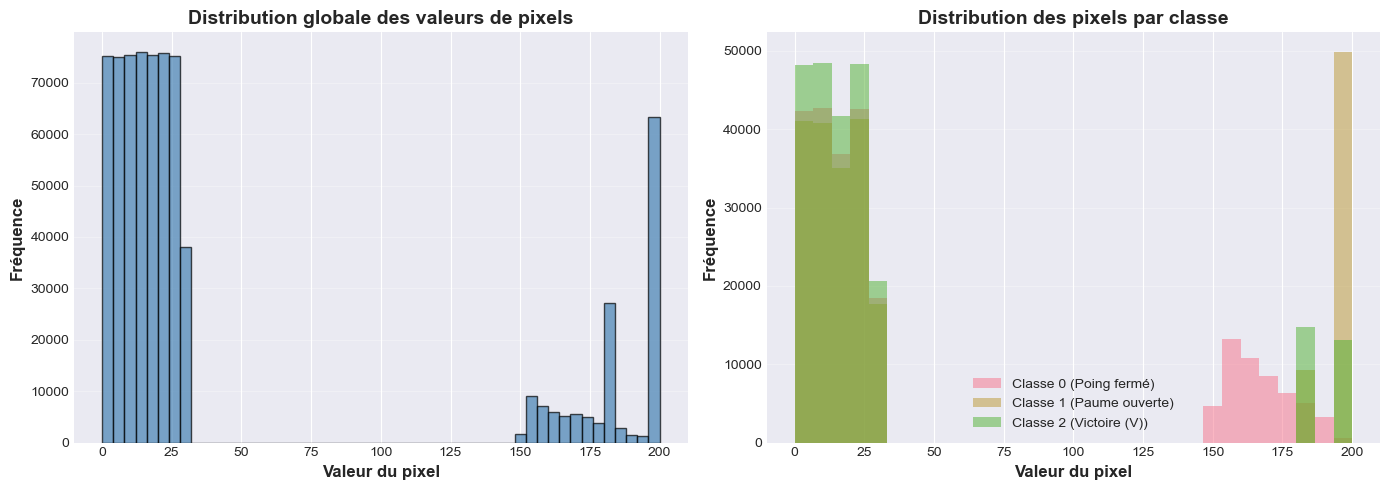


✅ Graphique sauvegardé : results/plots/distribution_pixels.png


In [4]:
# =============================================================================
# STATISTIQUES DES PIXELS
# =============================================================================

print("\n" + "="*70)
print("🔢 STATISTIQUES DES VALEURS DE PIXELS")
print("="*70)

# Séparer les features (pixels) des labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

print(f"\n📊 Statistiques globales des pixels :")
print(f"   - Valeur minimum  : {X_train.min()}")
print(f"   - Valeur maximum  : {X_train.max()}")
print(f"   - Valeur moyenne  : {X_train.mean():.2f}")
print(f"   - Écart-type      : {X_train.std():.2f}")
print(f"   - Médiane         : {np.median(X_train):.2f}")

# Statistiques par classe
print(f"\n📊 Statistiques par classe :")
for classe in np.unique(y_train):  # ✅ CORRECTION ICI : np.unique() au lieu de .unique()
    pixels_classe = X_train[y_train == classe]
    print(f"\n   Classe {classe} ({noms_classes[classe]}) :")
    print(f"      - Moyenne     : {pixels_classe.mean():.2f}")
    print(f"      - Écart-type  : {pixels_classe.std():.2f}")
    print(f"      - Min/Max     : {pixels_classe.min()} / {pixels_classe.max()}")

# Visualisation de la distribution des pixels
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme global
axes[0].hist(X_train.flatten(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Valeur du pixel', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution globale des valeurs de pixels', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Histogramme par classe
for classe in np.unique(y_train):  # ✅ CORRECTION ICI aussi
    pixels_classe = X_train[y_train == classe].flatten()
    axes[1].hist(pixels_classe, bins=30, alpha=0.5, label=f'Classe {classe} ({noms_classes[classe]})')

axes[1].set_xlabel('Valeur du pixel', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution des pixels par classe', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/plots/distribution_pixels.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Graphique sauvegardé : results/plots/distribution_pixels.png")


🖼️ VISUALISATION DES EXEMPLES PAR CLASSE


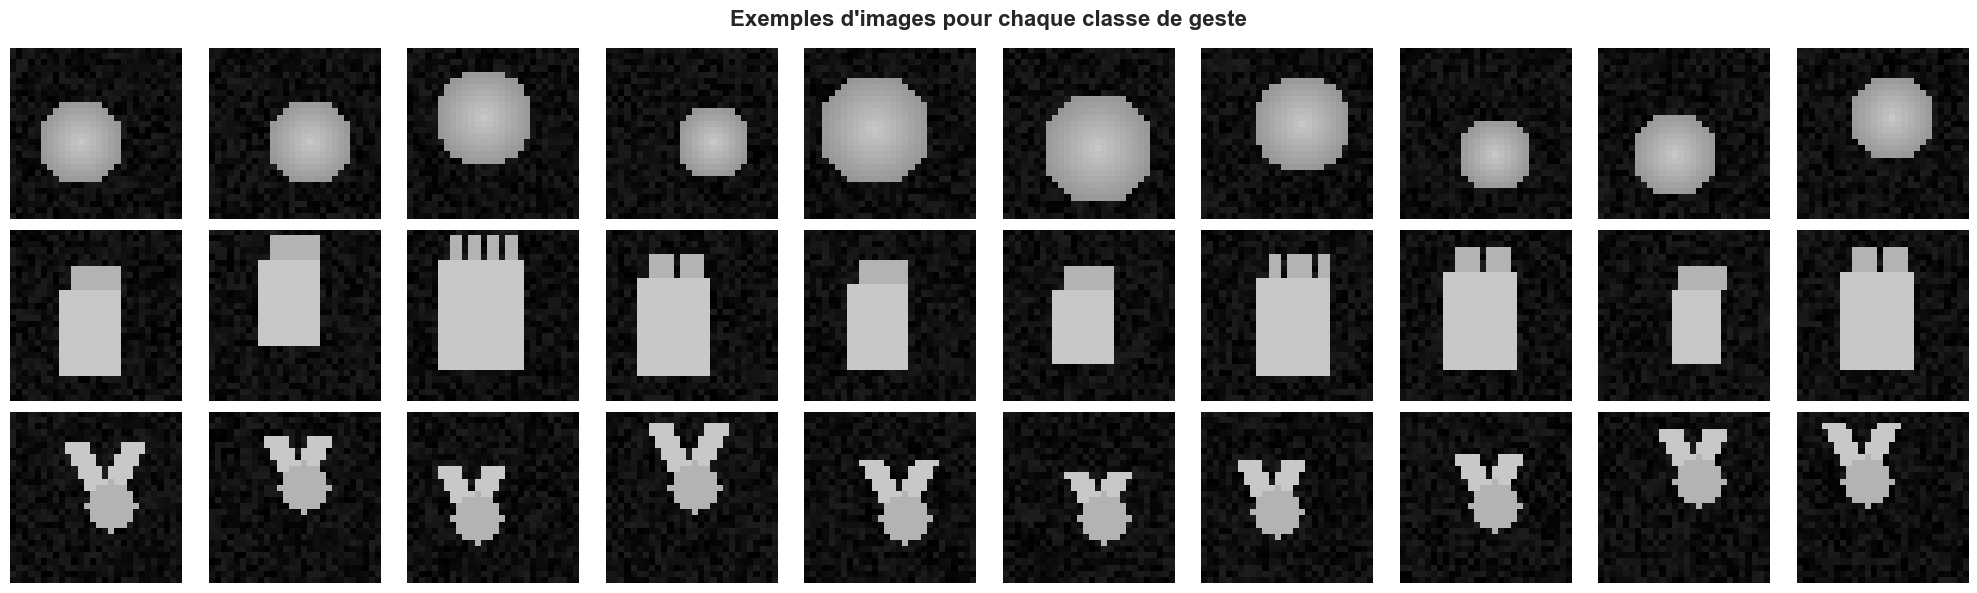


✅ Grille sauvegardée : results/plots/grille_exemples_classes.png


In [5]:
# =============================================================================
# VISUALISATION : Grille d'exemples par classe
# =============================================================================

print("\n" + "="*70)
print("🖼️ VISUALISATION DES EXEMPLES PAR CLASSE")
print("="*70)

# Créer une grille 3 lignes (classes) × 10 colonnes (exemples)
fig, axes = plt.subplots(3, 10, figsize=(20, 6))
fig.suptitle('Exemples d\'images pour chaque classe de geste', fontsize=16, fontweight='bold')

for classe in range(3):
    # Sélectionner 10 exemples aléatoires de cette classe
    indices_classe = np.where(y_train == classe)[0]
    indices_selectionnes = np.random.choice(indices_classe, 10, replace=False)
    
    for col, idx in enumerate(indices_selectionnes):
        # Récupérer l'image et la remodeler en 28×28
        image = X_train[idx].reshape(28, 28)
        
        # Afficher
        axes[classe, col].imshow(image, cmap='gray', vmin=0, vmax=255)
        axes[classe, col].axis('off')
        
        # Titre sur la première colonne uniquement
        if col == 0:
            axes[classe, col].set_ylabel(
                f"Classe {classe}\n{noms_classes[classe]}", 
                fontsize=11, 
                fontweight='bold',
                rotation=0,
                ha='right',
                va='center'
            )

plt.tight_layout()
plt.savefig('results/plots/grille_exemples_classes.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Grille sauvegardée : results/plots/grille_exemples_classes.png")


📊 CALCUL DES IMAGES MOYENNES PAR CLASSE
✅ Image moyenne calculée pour classe 0 (Poing fermé)
✅ Image moyenne calculée pour classe 1 (Paume ouverte)
✅ Image moyenne calculée pour classe 2 (Victoire (V))


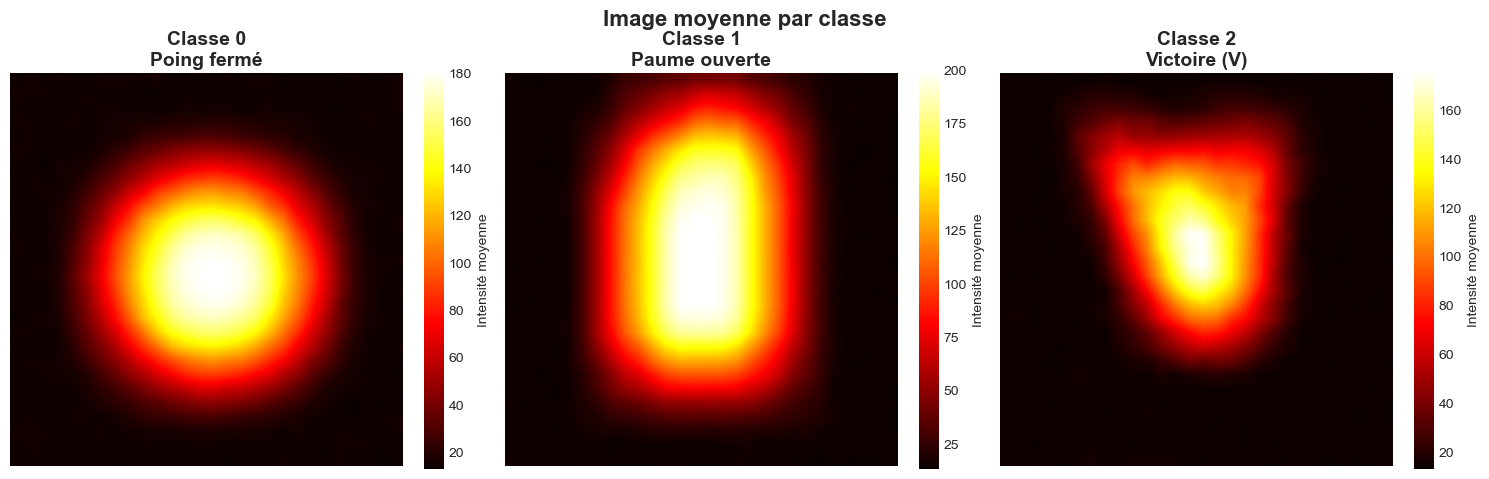


✅ Images moyennes sauvegardées : results/plots/images_moyennes.png

💡 Interprétation :
   Les zones lumineuses indiquent où les pixels sont généralement actifs
   pour chaque type de geste.


In [6]:
# =============================================================================
# VISUALISATION : Image moyenne par classe
# =============================================================================

print("\n" + "="*70)
print("📊 CALCUL DES IMAGES MOYENNES PAR CLASSE")
print("="*70)

# Calculer l'image moyenne pour chaque classe
images_moyennes = {}

for classe in range(3):
    # Sélectionner toutes les images de cette classe
    images_classe = X_train[y_train == classe]
    
    # Calculer la moyenne pixel par pixel
    image_moyenne = images_classe.mean(axis=0).reshape(28, 28)
    images_moyennes[classe] = image_moyenne
    
    print(f"✅ Image moyenne calculée pour classe {classe} ({noms_classes[classe]})")

# Visualiser les images moyennes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Image moyenne par classe', fontsize=16, fontweight='bold')

for classe in range(3):
    axes[classe].imshow(images_moyennes[classe], cmap='hot', interpolation='bilinear')
    axes[classe].set_title(f"Classe {classe}\n{noms_classes[classe]}", 
                          fontsize=14, fontweight='bold')
    axes[classe].axis('off')
    
    # Ajouter une barre de couleur
    cbar = plt.colorbar(axes[classe].images[0], ax=axes[classe], fraction=0.046)
    cbar.set_label('Intensité moyenne', fontsize=10)

plt.tight_layout()
plt.savefig('results/plots/images_moyennes.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Images moyennes sauvegardées : results/plots/images_moyennes.png")
print(f"\n💡 Interprétation :")
print(f"   Les zones lumineuses indiquent où les pixels sont généralement actifs")
print(f"   pour chaque type de geste.")


🔥 ANALYSE DE CORRÉLATION DES PIXELS

⏳ Calcul de la corrélation sur 100 images...
✅ Matrice de corrélation calculée : (49, 49)


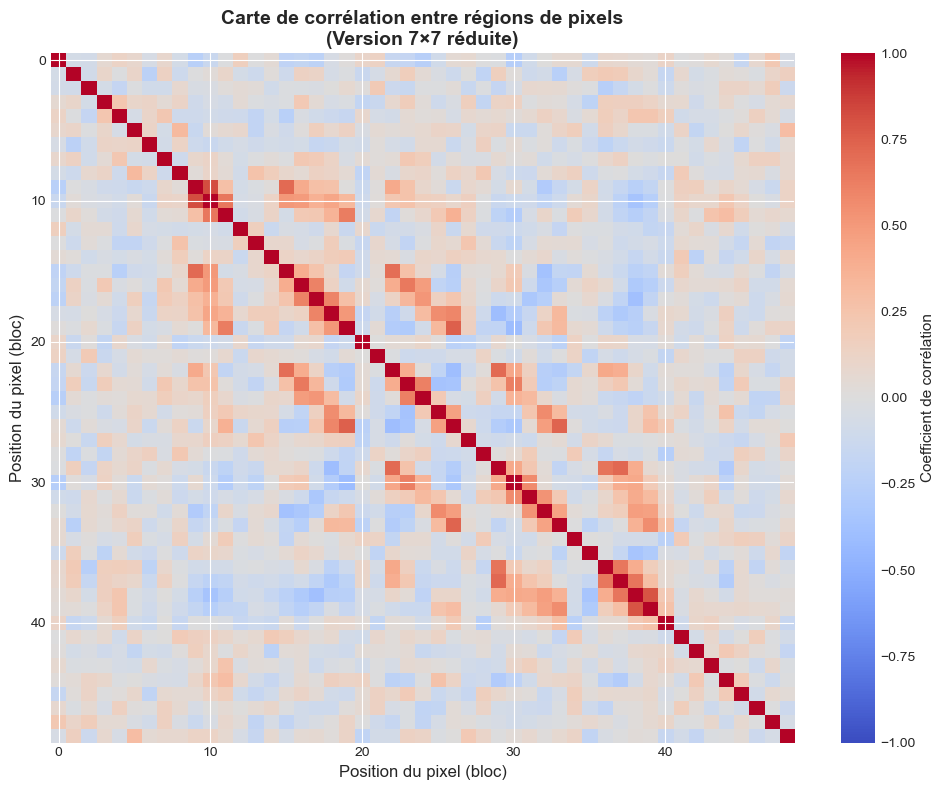


✅ Carte de corrélation sauvegardée : results/plots/correlation_pixels.png

💡 Interprétation :
   - Rouge : forte corrélation positive (pixels activés ensemble)
   - Bleu  : forte corrélation négative (inverse)
   - Blanc : pas de corrélation


In [7]:
# =============================================================================
# ANALYSE : Corrélation entre pixels voisins
# =============================================================================

print("\n" + "="*70)
print("🔥 ANALYSE DE CORRÉLATION DES PIXELS")
print("="*70)

# Prendre un échantillon pour le calcul (pour la vitesse)
echantillon_size = 100
echantillon = X_train[:echantillon_size]

print(f"\n⏳ Calcul de la corrélation sur {echantillon_size} images...")

# Calculer la matrice de corrélation (28×28 = 784 features)
# On va visualiser une version réduite (7×7) pour la lisibilité
echantillon_reduit = echantillon.reshape(-1, 28, 28)

# Redimensionner à 7×7 en faisant des moyennes de blocs 4×4
from scipy.ndimage import zoom
echantillon_7x7 = np.array([zoom(img, 0.25, order=1) for img in echantillon_reduit])
echantillon_7x7_flat = echantillon_7x7.reshape(echantillon_size, 49)

# Calculer la corrélation
correlation_matrix = np.corrcoef(echantillon_7x7_flat.T)

print(f"✅ Matrice de corrélation calculée : {correlation_matrix.shape}")

# Visualiser la carte de chaleur
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax.set_title('Carte de corrélation entre régions de pixels\n(Version 7×7 réduite)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Position du pixel (bloc)', fontsize=12)
ax.set_ylabel('Position du pixel (bloc)', fontsize=12)

# Ajouter une barre de couleur
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Coefficient de corrélation', fontsize=11)

plt.tight_layout()
plt.savefig('results/plots/correlation_pixels.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Carte de corrélation sauvegardée : results/plots/correlation_pixels.png")
print(f"\n💡 Interprétation :")
print(f"   - Rouge : forte corrélation positive (pixels activés ensemble)")
print(f"   - Bleu  : forte corrélation négative (inverse)")
print(f"   - Blanc : pas de corrélation")


📏 ANALYSE DE LA VARIABILITÉ INTRA-CLASSE

   Classe 0 (Poing fermé) :
      - Écart-type moyen : 32.51
      - Écart-type max   : 75.50

   Classe 1 (Paume ouverte) :
      - Écart-type moyen : 42.07
      - Écart-type max   : 93.33

   Classe 2 (Victoire (V)) :
      - Écart-type moyen : 30.94
      - Écart-type max   : 93.20


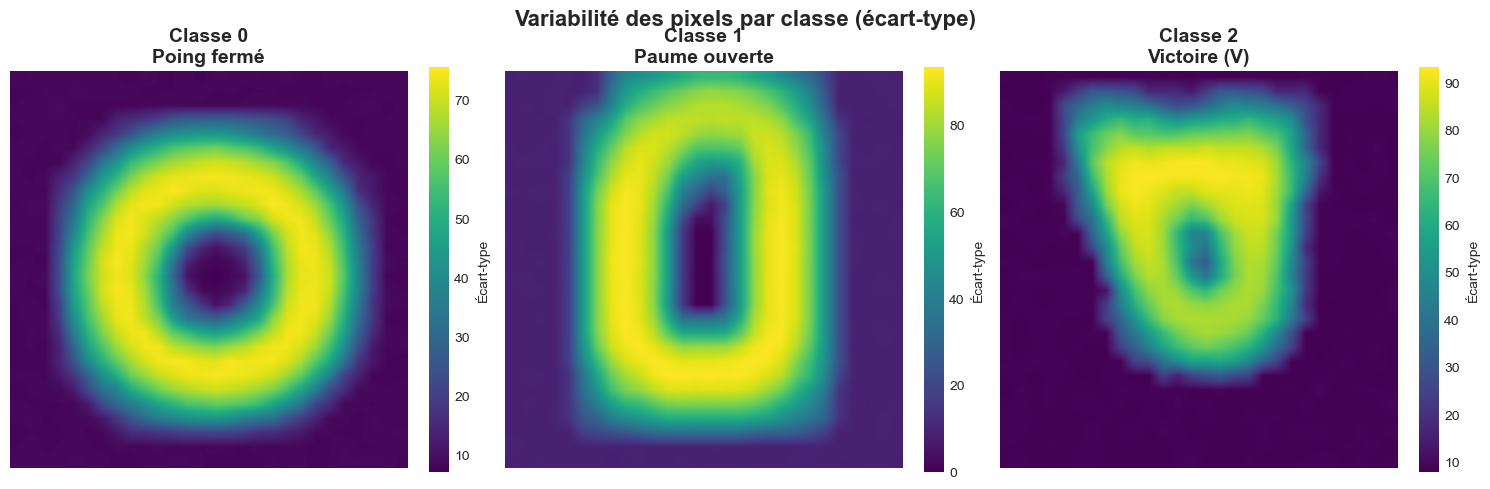


✅ Variabilité sauvegardée : results/plots/variabilite_intra_classe.png

💡 Interprétation :
   - Zones claires : pixels très variables (différents selon les exemples)
   - Zones sombres : pixels stables (similaires dans tous les exemples)


In [8]:
# =============================================================================
# ANALYSE : Variabilité intra-classe
# =============================================================================

print("\n" + "="*70)
print("📏 ANALYSE DE LA VARIABILITÉ INTRA-CLASSE")
print("="*70)

# Pour chaque classe, calculer l'écart-type des pixels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Variabilité des pixels par classe (écart-type)', fontsize=16, fontweight='bold')

for classe in range(3):
    # Sélectionner les images de la classe
    images_classe = X_train[y_train == classe]
    
    # Calculer l'écart-type pixel par pixel
    std_pixels = images_classe.std(axis=0).reshape(28, 28)
    
    # Visualiser
    im = axes[classe].imshow(std_pixels, cmap='viridis', interpolation='bilinear')
    axes[classe].set_title(f"Classe {classe}\n{noms_classes[classe]}", 
                          fontsize=14, fontweight='bold')
    axes[classe].axis('off')
    
    # Barre de couleur
    cbar = plt.colorbar(im, ax=axes[classe], fraction=0.046)
    cbar.set_label('Écart-type', fontsize=10)
    
    print(f"\n   Classe {classe} ({noms_classes[classe]}) :")
    print(f"      - Écart-type moyen : {std_pixels.mean():.2f}")
    print(f"      - Écart-type max   : {std_pixels.max():.2f}")

plt.tight_layout()
plt.savefig('results/plots/variabilite_intra_classe.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Variabilité sauvegardée : results/plots/variabilite_intra_classe.png")
print(f"\n💡 Interprétation :")
print(f"   - Zones claires : pixels très variables (différents selon les exemples)")
print(f"   - Zones sombres : pixels stables (similaires dans tous les exemples)")

In [10]:
# =============================================================================
# RÉSUMÉ DE L'EXPLORATION
# =============================================================================

print("\n" + "="*70)
print("📊 RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*70)

print(f"\n✅ Dataset chargé et analysé avec succès")
print(f"\n📦 Composition du dataset :")
print(f"   - Train : {len(train_df)} images")
print(f"   - Test  : {len(test_df)} images")
print(f"   - Total : {len(train_df) + len(test_df)} images")

print(f"\n🎯 Classes :")
for classe in range(3):
    nb_train = (y_train == classe).sum()
    nb_test = (test_df['label'] == classe).sum()
    print(f"   - Classe {classe} ({noms_classes[classe]:15s}) : {nb_train} train + {nb_test} test")

print(f"\n📊 Caractéristiques des images :")
print(f"   - Taille        : 28×28 pixels")
print(f"   - Format        : Niveaux de gris")
print(f"   - Plage valeurs : {X_train.min()} à {X_train.max()}")
print(f"   - Type données  : {X_train.dtype}")

print(f"\n🖼️ Visualisations créées :")
plots_crees = [
    'results/plots/distribution_pixels.png',
    'results/plots/grille_exemples_classes.png',
    'results/plots/images_moyennes.png',
    'results/plots/correlation_pixels.png',
    'results/plots/variabilite_intra_classe.png'
]

for plot in plots_crees:
    if os.path.exists(plot):
        print(f"   ✅ {plot}")
    else:
        print(f"   ❌ {plot} manquant")

print(f"\n" + "="*70)
print("✅ EXPLORATION TERMINÉE AVEC SUCCÈS")
print("="*70)
print(f"\n➡️ Prochaine étape : 03_preprocessing.ipynb")
print(f"   Nous allons prétraiter les images avec OpenCV pour améliorer")
print(f"   la qualité avant l'entraînement du modèle.")


📊 RÉSUMÉ DE L'EXPLORATION DES DONNÉES

✅ Dataset chargé et analysé avec succès

📦 Composition du dataset :
   - Train : 900 images
   - Test  : 300 images
   - Total : 1200 images

🎯 Classes :
   - Classe 0 (Poing fermé    ) : 300 train + 100 test
   - Classe 1 (Paume ouverte  ) : 300 train + 100 test
   - Classe 2 (Victoire (V)   ) : 300 train + 100 test

📊 Caractéristiques des images :
   - Taille        : 28×28 pixels
   - Format        : Niveaux de gris
   - Plage valeurs : 0 à 200
   - Type données  : int64

🖼️ Visualisations créées :
   ✅ results/plots/distribution_pixels.png
   ✅ results/plots/grille_exemples_classes.png
   ✅ results/plots/images_moyennes.png
   ✅ results/plots/correlation_pixels.png
   ✅ results/plots/variabilite_intra_classe.png

✅ EXPLORATION TERMINÉE AVEC SUCCÈS

➡️ Prochaine étape : 03_preprocessing.ipynb
   Nous allons prétraiter les images avec OpenCV pour améliorer
   la qualité avant l'entraînement du modèle.
